In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# I. Gathering data
> These are the steps to get the required data for this project:
- Load WeRateDogs archive from 'twitter-archive-enhanced.csv' file provided by Udacity
- Download predictions data programmatically from Udacity's server and save data as flat file
- Get extra data (retweet and favorite counts) for WeRateDogs tweets via Twitter API
 

In [6]:
# load WeRateDogs Twitter Archive via csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [7]:
# download image predictions programmatically and save it
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
response = requests.get(url)

# Save the file locally
with open(filename, mode='wb') as file :
       file.write(response.content)
        
# Load data from downloaded file
df_predictions = pd.read_csv(filename, sep='\t')

In [8]:
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [9]:
# Set your twitter credentials
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

# Authenticate with tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 retry_count=1,
                 retry_errors=[88], # Rate limit reached
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [10]:
# Extract and save tweet record for each tweet id in our archive
json_file = 'tweet_json.txt'
with open(json_file, mode='w', encoding='utf-8') as file :
    
    for i, tweet_id in enumerate(df_archive['tweet_id']) :
        try :
            print('Processing ' +str(i+1) + '/' + str(len(df_archive['tweet_id'])) + ' tweets', end='\r')
            tweet = api.get_status(tweet_id, extended=True)
            file.write(str(tweet._json) + '\n')            
        except Exception as e: 
            print('Error with tweet ' + str(tweet_id) + ': ' + str(e))

Error with tweet 888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 856330835276025856: [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
Error with tweet 851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 84545907679

In [4]:
# Load data from saved file
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        # format the record into proper json 
        # i.e. double quotes instead of single quotes 
        l = eval(line.strip())
        data.append(l)

df_extended = pd.read_json(json.dumps(data))


In [5]:
df_extended.head(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34583,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,7201,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,29979,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,5408,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# II. Assessing Data

There are 3 dataframes:
- df_archive: WeRateDogs Twitter Archive
- df_predictions: Image Predictions
- df_extended: Extended information for each Tweet (favorite counts and retweet count)

**df_archive**

In [12]:
df_archive.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
965,750429297815552001,NaN,NaN,2016-07-05 20:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
795,773308824254029826,NaN,NaN,2016-09-06 23:56:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bungalo. She uses that face to get wha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
1177,719704490224398336,NaN,NaN,2016-04-12 01:51:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,None,None,pupper,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
1704,680889648562991104,NaN,NaN,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo
1066,740699697422163968,NaN,NaN,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,None,None,None,None
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## Issues Summary:
> Some of these issues have been spotted using Excel.

### 1. Quality:
- df_archive:
  1. There are retweets and replies and they should be removed.
  2. There are some ratings without images and they should be removed as well.
  3. There are columns that should be removed because they aren't needed, like  'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.
  4. There names that are invalid (like a, such). All invalid names start with lowercase. 
  5. The rating denominator seems to be innacurated in some cases because there are rows with a rating denominator different from 10. Remove those entries and also once all entries have the same rating_denominator, the column can be dropped as well.
  6. The rating_numerator seemts to be innacurate too. There are valid cases with this column below 15, but rating_numerator greater than 15 are invalid. Delete rows with a rating_numerator higher than 15.
  7. The timestamp column ihas incorrect format and type. Fix both issues, removing +0000 and converting into datetime type.
  8. The source column contains html that doesn't add any value. Remove html code.
- df_predictions:
  9. Predicted breed names should be normalized. This means that columns p1, p2 and p3 shouldn't contain '_' as separator and all should be capitalized, in order to analyze this information later in an easy way.
- df_extended:
  10. Remove unnecessary columns. We are interested only in 'id', 'favorite_count' and 'retweet_count' columns.
  
### 2. Tidiness:
- df_archive:
  1. There are 4 columns: doggo, floofer, pupper and puppo that should be in unique Categorical column.
- df_predictions:
  2. Predicted breed names should be in an unique column called 'dog_breed'.
- df_extended:
  3. Rename the column 'id' to 'tweet_id' to allow easy merging.
- Merge the 3 dataframes

# III. Cleaning Data

In [48]:
# create copies of dataframes before starting the cleaning
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_extended_clean = df_extended.copy()

## 1. Quality Issue

**Define:** There are retweets and replies and they should be removed.

**Code:** Filter out rows which have 'retweeted_status_id' or 'in_reply_to_user_id' columns with values from df_archive_clean.

In [49]:
df_archive_clean.drop(df_archive_clean[(df_archive_clean.retweeted_status_id.notnull()) | (df_archive_clean.in_reply_to_user_id.notnull())].index, inplace=True)

**Test:** 

In [50]:
# check that there isn't any retweet
assert sum(df_archive_clean.retweeted_status_id.notnull()) == 0
# check that there isn't any reply
assert sum(df_archive_clean.in_reply_to_user_id.notnull()) == 0

## 2. Quality Issue

**Define:** There are some ratings without image and they should be removed as well.

**Code:** Remove rows whose 'expanded_urls' column is null from df_archive_clean.

In [51]:
df_archive_clean.drop(df_archive_clean[df_archive_clean['expanded_urls'].isnull()].index, inplace=True)

**Test:**

In [52]:
# check that there isn't any row with null values in 'expanded_urls' column
assert sum(df_archive_clean.expanded_urls.isnull()) == 0

## 3. Quality Issue

**Define:** There are columns that should be removed because they aren't needed, like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.

**Code:** Remove those columns from df_archive_clean.

In [53]:
df_archive_columns_to_be_dropped = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls']
df_archive_clean.drop(df_archive_columns_to_be_dropped, axis=1, inplace=True)

**Test:**

In [54]:
# Check that those columns don't exist anymore in df_archive_clean
assert ~any(item in df_archive_clean.columns.tolist() for item in df_archive_columns_to_be_dropped)

## 4. Quality Issue

**Define:** There names that are invalid (like a, such) and all start with lowercase. Also, when there is no name the value is set to 'None' instead of null value.

**Code:** Replace names which start with lowercase and which are equal to 'None' to null (np.nan) from df_archive_clean.

In [55]:
# replace all names which start with lowercase to literal to None
df_archive_clean['name'] = df_archive_clean['name'].str.replace(r'^[a-z]', 'None', regex=True)

**Test:**

In [56]:
assert sum(df_archive_clean['name'].str.contains('^[a-z]'))==0

**Code:** Replace names which are equal to 'None' to null (np.nan) from df_archive_clean.

In [57]:
# replace 'None' literal to NaN
df_archive_clean['name'].replace('None', np.nan, inplace=True)

**Test:**

In [60]:
assert df_archive_clean.query('name=="None"').tweet_id.count() == 0

## 5. Quality Issue

**Define:** The rating denominator seems to be innacurated in some cases because there are rows with a rating denominator different than 10. 

**Code:** Remove those entries from df_archive_clean. Also, once all entries have the same rating_denominator, the column can be dropped as well. 

In [61]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_denominator != 10].index, inplace = True)

**Test:**

In [62]:
df_archive_clean.rating_denominator.value_counts()

10    2077
Name: rating_denominator, dtype: int64

**Code:** Also, once all entries have the same rating_denominator, the column can be dropped as well.

In [63]:
df_archive_clean.drop(['rating_denominator'], axis=1, inplace=True)

**Test:**

In [64]:
assert 'rating_denominator' not in df_archive_clean.columns.tolist()

## 6. Quality Issue

**Define:** The rating_numerator seemts to be innacurated too. There are valid cases with this column below 15, but rating_numerator greater than 15 are invalid. 

**Code:**  Delete rows from df_archive_clean with a rating_numerator higher than 15. 

In [65]:
df_archive_clean.drop(df_archive_clean[df_archive_clean.rating_numerator > 15].index, inplace = True)

**Test:**

In [66]:
df_archive_clean.rating_numerator.value_counts()

12    485
10    434
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

**Code:**  Rename rating_numerator column to rating from df_archive_clean.

In [67]:
df_archive_clean.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

**Test:**

In [68]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id     2072 non-null int64
timestamp    2072 non-null object
source       2072 non-null object
text         2072 non-null object
rating       2072 non-null int64
name         1431 non-null object
doggo        2072 non-null object
floofer      2072 non-null object
pupper       2072 non-null object
puppo        2072 non-null object
dtypes: int64(2), object(8)
memory usage: 178.1+ KB


## 7. Quality Issue

**Define:** 'timestamp' column has incorrect format and type.

**Code:**  Fix both issues, removing +0000 and converting into datetime type from df_archive_clean. 

In [69]:
# Strip +0000 from timestamp column
df_archive_clean.timestamp = df_archive_clean.timestamp.str.strip('+0000')

# Convert data type to datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

**Test:**

In [70]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id     2072 non-null int64
timestamp    2072 non-null datetime64[ns]
source       2072 non-null object
text         2072 non-null object
rating       2072 non-null int64
name         1431 non-null object
doggo        2072 non-null object
floofer      2072 non-null object
pupper       2072 non-null object
puppo        2072 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.1+ KB


## 8. Quality Issue

**Define:** 'source' column contains html that doesn't add any value.

**Code:**  Remove html code from 'source' column in df_archive_clean. 

In [71]:
df_archive_clean['source'] = df_archive_clean['source'].str.extract('>(.*)<')

**Test:**

In [72]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1941
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

## 9. Quality Issue

**Define:** Predicted breed names should be normalized. This means that columns 'p1', 'p2' and 'p3' shouldn't contain '_' as separator and all should be capitalized, in order to analyze this information later in an easy way.

**Code:** Replace '_' from 'p1', 'p2' and 'p3' columns in df_predictions_clean. Capitalize breed names.

In [73]:
# Replace '_' from 'p1', 'p2' and 'p3' columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('_', " ")
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('_', " ")
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('_', " ")

# capitalize 'p1', 'p2' and 'p3' columns
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.title()
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.title()
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.title()

**Test:**

In [74]:
df_predictions_clean.p1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Cocker Spaniel                30
Malamute                      30
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            23
Seat Belt                     22
German Shepherd               20
Siberian Husky                20
Staffordshire Bullterrier     20
Web Site                      19
Cardigan                      19
Teddy                         18
Eskimo Dog                    18
Beagle                        18
Shetland Sheepdog             18
Maltese Dog                   18
Lakeland Terrier              17
Shih-Tzu                      17
Rottweiler                    17
Kuvasz                        16
Italian Greyhound             16
          

## 10. Quality Issue

**Define:** Remove not needed columns in df_extended. We are interested only on 'id', 'favorite_count' and 'retweet_count' columns.

**Code:**  Drop not needed columns from df_extended_clean.

In [75]:
df_extended_columns_to_be_dropped = ['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorited', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user']
df_extended_clean.drop(df_extended_columns_to_be_dropped, axis=1, inplace=True)

**Test:**

In [76]:
# Check that those columns don't exist anymore in df_extended_clean
assert ~any(item in df_extended_clean.columns.tolist() for item in df_extended_columns_to_be_dropped)

## 1. Tidiness Issue

**Define:** There are 4 columns: doggo, floofer, pupper and puppo that should be in unique Categorical column.

**Code:**  Create a Categorical column called 'dog_stage' with the values of doggo, floofer, pupper and puppo in df_archive_clean.

In [77]:
# Extracting the dog stage variables from the text column when available 
df_archive_clean['dog_stage'] = df_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

# Drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test:**

In [78]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id     2072 non-null int64
timestamp    2072 non-null datetime64[ns]
source       2072 non-null object
text         2072 non-null object
rating       2072 non-null int64
name         1431 non-null object
dog_stage    345 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 129.5+ KB


In [79]:
df_archive_clean.dog_stage.value_counts()

pupper     233
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

## 2. Tidiness Issue

**Define:** There are 3 columns: p1, p2 and p3 that should be in an unique column.

**Code:**  Create a column called 'dog_breed' with the values of p1, p2 and p3 columns of df_predictions_clean. Drop not needed columns.

In [87]:
# create a 'dog_breed' column with the value of the highest prediction, when it is possible
df_predictions_clean['dog_breed'] = np.where(df_predictions_clean['p1_dog'], df_predictions_clean['p1'],
                              np.where(df_predictions_clean['p2_dog'], df_predictions_clean['p2'],
                              np.where(df_predictions_clean['p3_dog'], df_predictions_clean['p3'],
                              np.nan
                              )))

# Drop 'p1_dog', 'p1_conf', 'p1', 'p2_dog', 'p2_conf', 'p2', 'p3_dog', 'p3_conf', 'p3', 'jpg_url', 'img_num' columns
df_predictions_clean.drop(['p1_dog', 'p1_conf', 'p1', 'p2_dog', 'p2_conf', 'p2', 'p3_dog', 'p3_conf', 'p3', 'jpg_url', 'img_num'], axis=1, inplace=True)

**Test:**

In [88]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id     2075 non-null int64
dog_breed    1751 non-null object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [86]:
df_predictions_clean.dog_breed.value_counts()

Golden Retriever                  173
Labrador Retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy Poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Cocker Spaniel                     34
Malamute                           34
French Bulldog                     32
Chesapeake Bay Retriever           31
Miniature Pinscher                 26
Cardigan                           23
Eskimo Dog                         22
Staffordshire Bullterrier          22
German Shepherd                    21
Beagle                             21
Siberian Husky                     20
Shih-Tzu                           20
Kuvasz                             19
Maltese Dog                        19
Shetland Sheepdog                  19
Lakeland Terrier                   19
Rottweiler                         19
Italian Grey

## 3. Tidiness Issue

**Define:** Rename the column 'id' to 'tweet_id' to allow easy merging.

**Code:**  Rename the column 'id' to 'tweet_id' in df_extended_clean.

In [82]:
df_extended_clean.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

**Test:**

In [83]:
df_extended_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2328 entries, 0 to 2327
Data columns (total 3 columns):
favorite_count    2328 non-null int64
tweet_id          2328 non-null int64
retweet_count     2328 non-null int64
dtypes: int64(3)
memory usage: 72.8+ KB


## 4. Tidiness Issue

**Define:** Merge the 3 dataframes in an unique dataframe.

**Code:**  Join df_archive_clean, df_predictions_clean and df_extended_clean in one dataframe called df_master_clean.

In [89]:
# join 'df_archive_clean' and 'df_predictions_clean'
df_master_clean = pd.merge(df_archive_clean, df_predictions_clean,
                                   how = 'inner', on = 'tweet_id')
# join 'df_master_clean' and 'df_extended_clean'
df_master_clean = pd.merge(df_master_clean, df_extended_clean,
                                   how = 'inner', on = 'tweet_id')

**Test:**

In [90]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 10 columns):
tweet_id          1941 non-null int64
timestamp         1941 non-null datetime64[ns]
source            1941 non-null object
text              1941 non-null object
rating            1941 non-null int64
name              1377 non-null object
dog_stage         313 non-null object
dog_breed         1639 non-null object
favorite_count    1941 non-null int64
retweet_count     1941 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 166.8+ KB


# IV. Storing, Analyzing and Visualizing Data

**Storing the cleaned file**

In [91]:
# Store the cleaned dataframe as CSV file 
df_master_clean.to_csv('twitter_archive_master.csv')

## Analyzing Data
These are the following questions that will be answered:
1. Is there any correlation between any variable?
2. How popular is "WeRatedDogs" over time?
3. Which is the most common dog stage? and the most rated one? 
4. Which are the top 10 breeds with highest ratings?
5. Which are the top 10 most liked dog breeds?
6. Which are the top 10 most popular dog breeds?
7. Which are the top 5 most common dog names?
8. How is the distribution of Tweet sources?

In [92]:
df_master_clean.shape

(1941, 10)

In [93]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 10 columns):
tweet_id          1941 non-null int64
timestamp         1941 non-null datetime64[ns]
source            1941 non-null object
text              1941 non-null object
rating            1941 non-null int64
name              1377 non-null object
dog_stage         313 non-null object
dog_breed         1639 non-null object
favorite_count    1941 non-null int64
retweet_count     1941 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 166.8+ KB


In [94]:
df_master_clean.describe()

,tweet_id,rating,favorite_count,retweet_count
count,1.941000e+03,1941.00000,1941.000000,1941.000000
mean,7.359568e+17,10.53220,7943.820711,2317.643483
std,6.765797e+16,2.17569,11714.557930,4156.057587
min,6.660209e+17,0.00000,67.000000,11.000000
25%,6.757816e+17,10.00000,1672.000000,514.000000
50%,7.084699e+17,11.00000,3568.000000,1120.000000
75%,7.881783e+17,12.00000,9907.000000,2643.000000
max,8.924206e+17,14.00000,148346.000000,72874.000000


### First impressions of the data:
There are some observations that can be done now:
- There are 1941 rows and 10 columns.
- There are some incomplete tweets: 
  - 564 tweets without name, 
  - 302 tweets without dog_breed 
  - 1628 tweets without dog_stage.
- The rating average is 10.53, which is very high. 25% of the tweets have a rating lower than 10. The minimun rating is 0 and the maximun 14.
- The favorite_count average is 7,943.82. 75% of the tweets have a favorite_count higher than 9,907. The minimun favorite_count is 67 and the maximun 148,346.
- The retweet_count average is 2,317.64. 75% of the tweets have a retweet_count higher than 2,643. The minimun retweet_count is 11 and the maximun 72,874.

### Question 1. Is there any correlation between any variable?

In [95]:
df_master_clean.corr()

,tweet_id,rating,favorite_count,retweet_count
tweet_id,1.000000,0.530829,0.615665,0.387579
rating,0.530829,1.000000,0.390670,0.296160
favorite_count,0.615665,0.390670,1.000000,0.927884
retweet_count,0.387579,0.296160,0.927884,1.000000


There is a strong positive correlation between favorite_count and retweet_count (0.9279) which means that when a tweet increases its number of retweets then the number of likes increases as well.

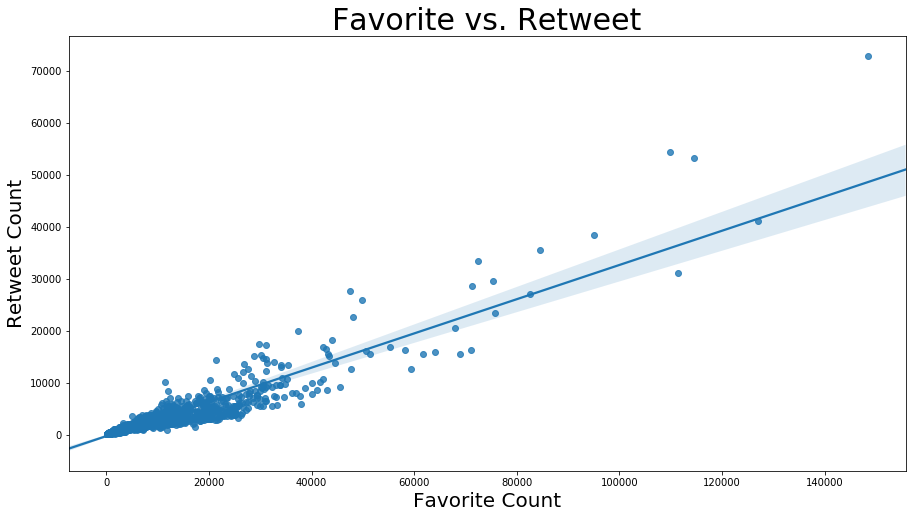

In [98]:
# Visualize the correlation between favorite_count and retweet_count
plt.figure(figsize=(15,8))
plt.title("Favorite vs. Retweet", size=30)
sns.regplot(x='favorite_count', y='retweet_count', data=df_master_clean)
plt.ylabel("Retweet Count", size=20)
plt.xlabel("Favorite Count", size=20);

### Question 2. How popular is WeRateDogs?

In [7]:
# Create year month for trending
df_master_clean['year-month'] = df_master_clean['timestamp'].map(lambda x: str(x.year) + '-' + str(x.month).zfill(2))

In [8]:
avg_counts = df_master_clean.groupby('year-month')[['favorite_count', 'retweet_count', 'rating']].mean().reset_index()

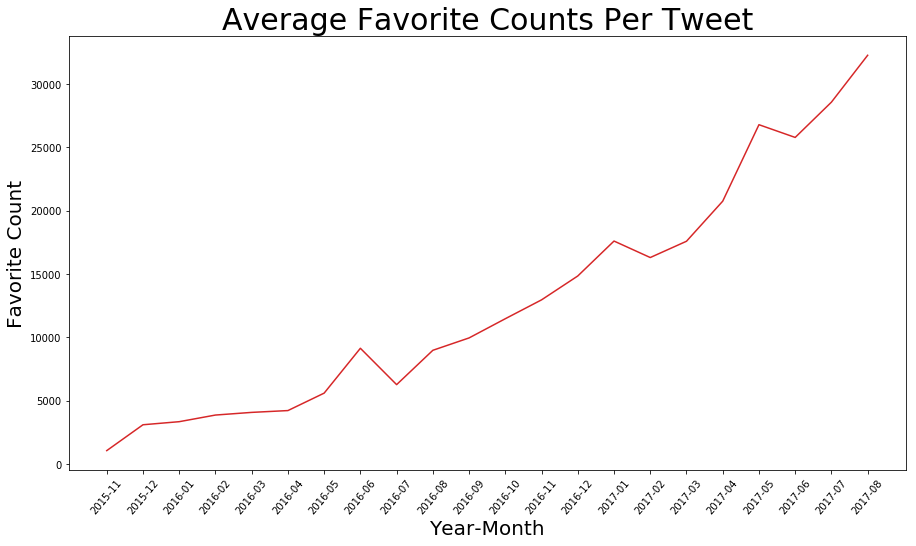

In [129]:
# Favorite Count Trend
plt.figure(figsize=(15,8))
plt.plot(list(avg_counts['year-month']), list(avg_counts['favorite_count']), color="tab:red")
plt.xlabel('Year-Month', size=20) 
plt.ylabel('Favorite Count', size=20) 
plt.title('Average Favorite Counts Per Tweet', size=30)
plt.xticks(rotation=50)
plt.show();

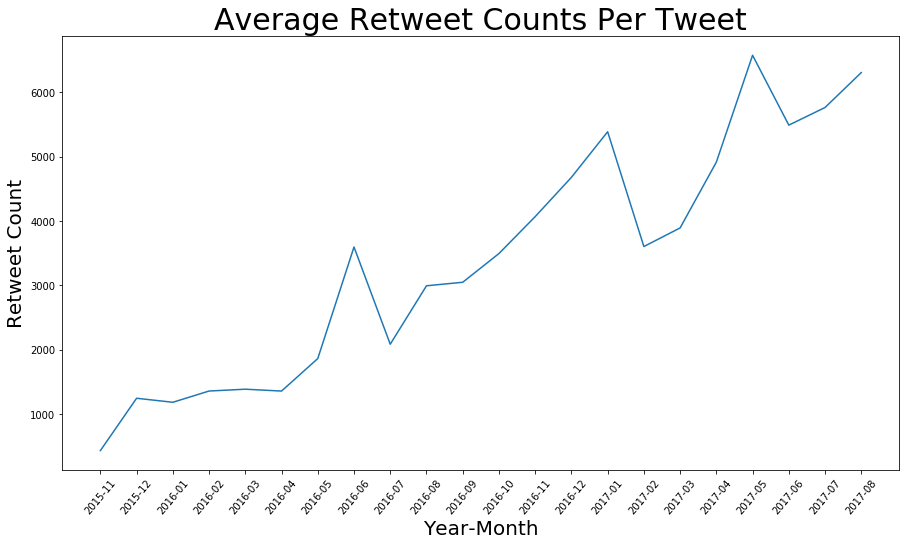

In [108]:
# Retweet Count
plt.figure(figsize=(15,8))
plt.plot(list(avg_counts['year-month']), list(avg_counts['retweet_count']), color="tab:blue")
plt.xlabel('Year-Month', size=20) 
plt.ylabel('Retweet Count', size=20)
plt.title('Average Retweet Counts Per Tweet', size=30)
plt.xticks(rotation=50)
plt.show();

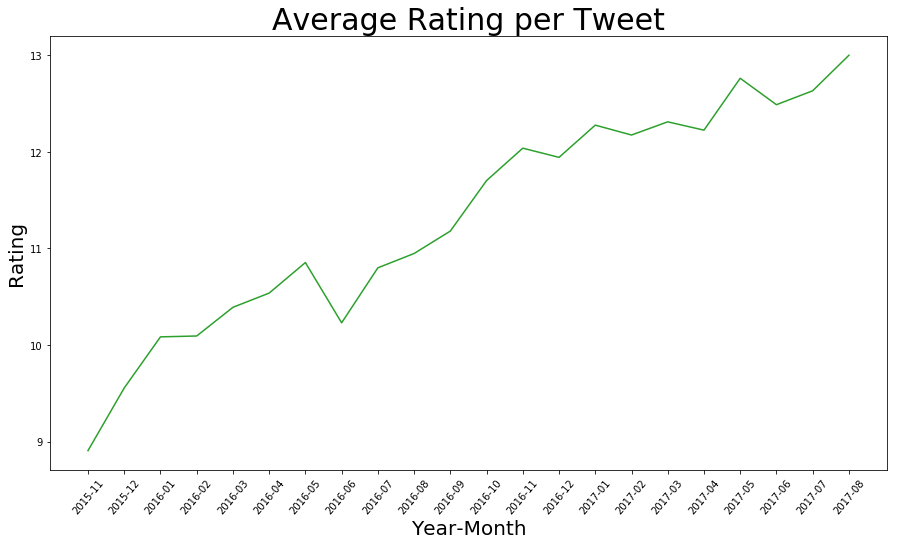

In [9]:
# Rating Trend
plt.figure(figsize=(15,8))
plt.plot(list(avg_counts['year-month']), list(avg_counts['rating']), color="tab:green")
plt.xlabel('Year-Month', size=20) 
plt.ylabel('Rating', size=20) 
plt.title('Average Rating per Tweet', size=30)
plt.xticks(rotation=50)
plt.show();

Taking a look at the average of favorite count and retweet count per tweet, we can say that WeRatesDog has increased in popularity over the time. The trend of favorite count, retweet count and rating was decidedly upward. The highest peak of likes was in August, 2017, reaching around 30,000 likes per tweet.

### Question 3. Which is the most common dog stage? and the most rated one? 

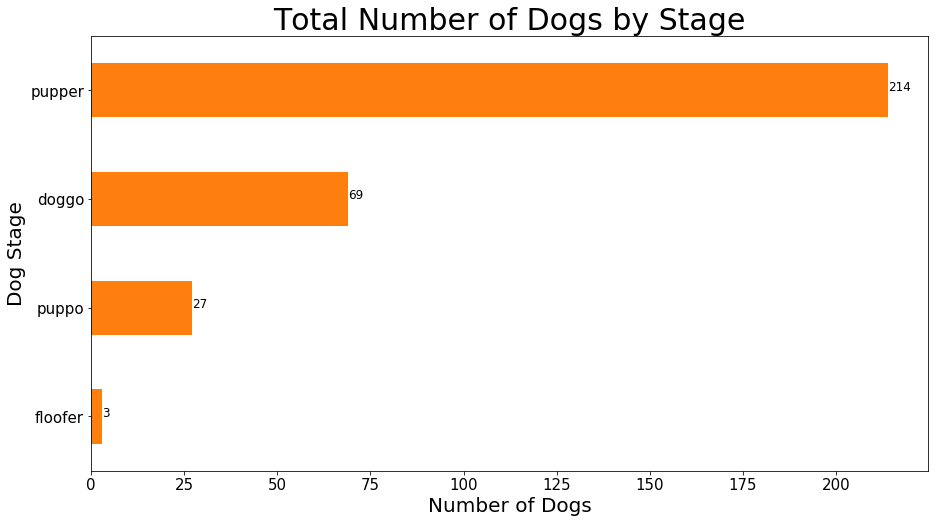

In [128]:
plt.figure(figsize=(15,8))
plt.title("Total Number of Dogs by Stage", size=30)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("Number of Dogs", size=20)
df_master_clean.dog_stage.value_counts().sort_values().plot(kind='barh', fontsize=15, color="tab:orange");
for i, v in enumerate(df_master_clean.dog_stage.value_counts().sort_values()):
    plt.text(v, i, "{0:.0f}".format(v), color='black', size=12)
plt.show();

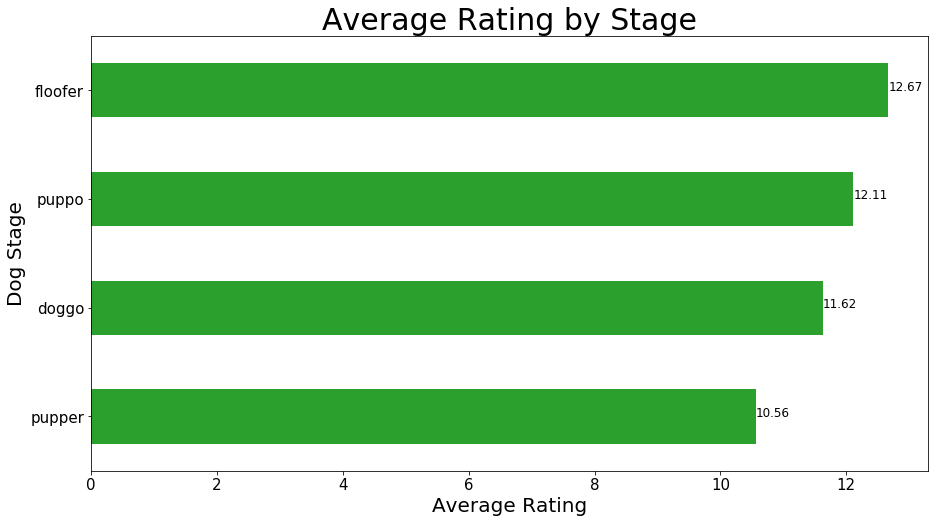

In [172]:
plt.figure(figsize=(15,8))

df_master_clean.groupby(['dog_stage']).mean().rating.sort_values().plot(kind='barh', fontsize=15, color="tab:green");
for i, v in enumerate(df_master_clean.groupby(['dog_stage']).mean().rating.sort_values()):
    plt.text(v, i, "{0:.2f}".format(v), color='black', size=12)
plt.title("Average Rating by Stage", size=30)
plt.ylabel("Dog Stage", size=20)
plt.xlabel("Average Rating", size=20)
plt.show();

The most common dog stage is pupper (214 dogs). However, pupper is the dog stage with the lowest average rating (10.56). The dog stage with the highest average rating is floofer, but it's also the less common dog stage (only 3 dogs).

### Question 4. Which are the top 10 breeds with highest ratings?

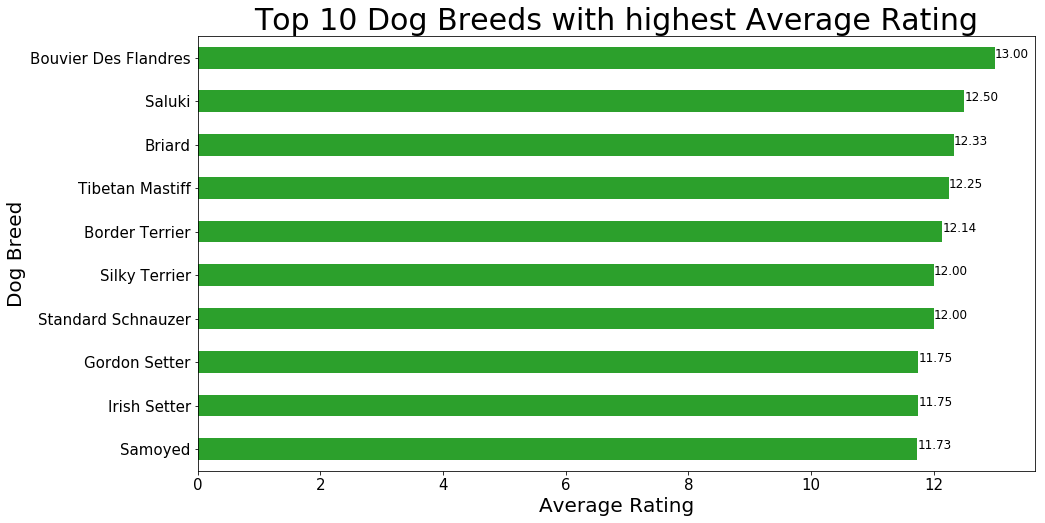

In [173]:
top_10_most_rated_by_dog_breed = df_master_clean.groupby(['dog_breed']).mean().rating.sort_values().nlargest(10).sort_values()

plt.figure(figsize=(15,8))
top_10_most_rated_by_dog_breed.plot(kind='barh', fontsize=15, color="tab:green");
for i, v in enumerate(top_10_most_rated_by_dog_breed):
    plt.text(v, i, "{0:.2f}".format(v), color='black', size=12)
plt.title("Top 10 Dog Breeds with highest Average Rating", size=30)
plt.ylabel("Dog Breed", size=20)
plt.xlabel("Average Rating", size=20)
plt.show();

### Question 5. Which are the top 10 most liked dog breeds?

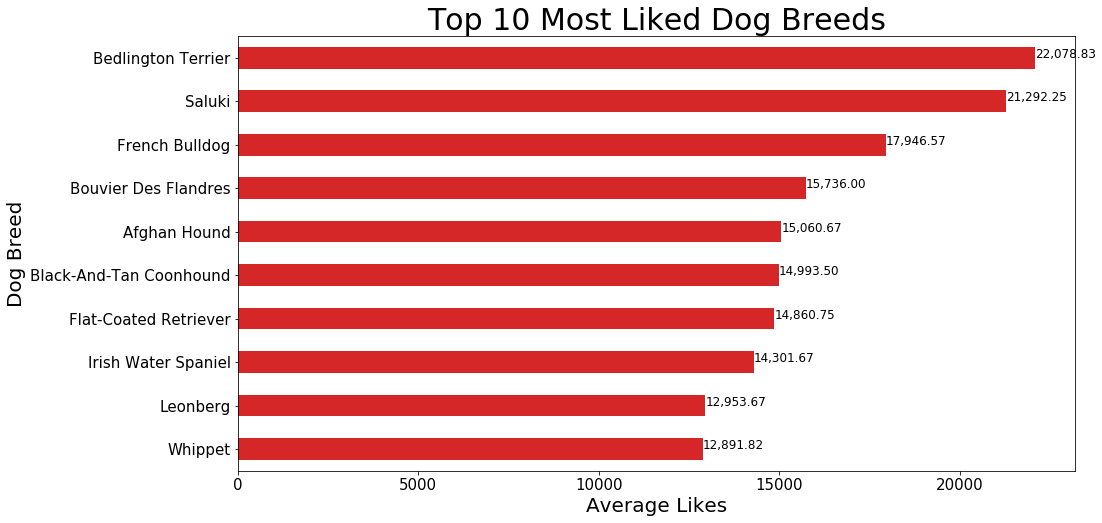

In [174]:
top_10_most_liked_by_dog_breed = df_master_clean.groupby(['dog_breed']).mean().favorite_count.sort_values().nlargest(10).sort_values()

plt.figure(figsize=(15,8))
top_10_most_liked_by_dog_breed.plot(kind='barh', fontsize=15, color="tab:red");
for i, v in enumerate(top_10_most_liked_by_dog_breed):
    plt.text(v, i, "{0:,.2f}".format(v), color='black', size=12)
plt.title("Top 10 Most Liked Dog Breeds", size=30)
plt.ylabel("Dog Breed", size=20)
plt.xlabel("Average Likes", size=20)

plt.show();

### Question 6. Which are the top 10 most popular dog breeds?

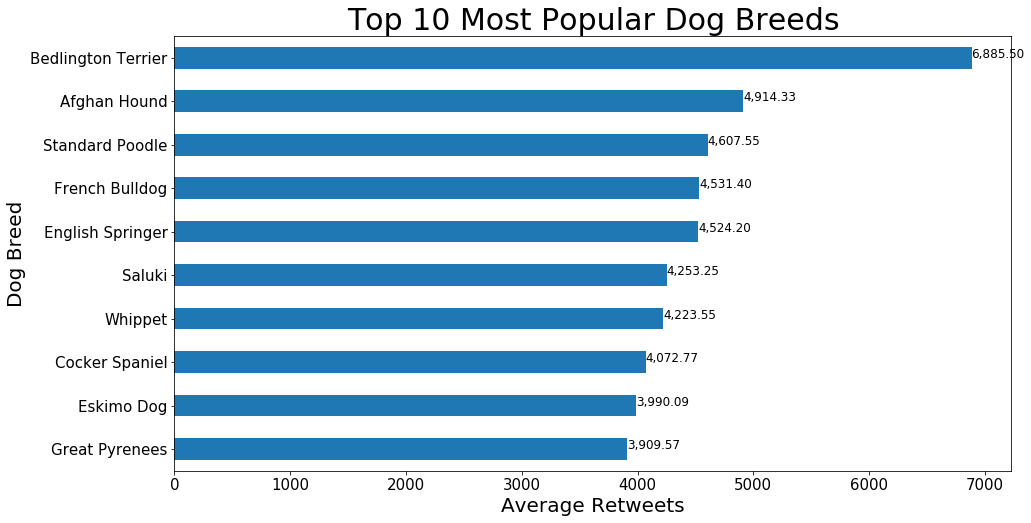

In [175]:
top_10_most_popular_by_dog_breed = df_master_clean.groupby(['dog_breed']).mean().retweet_count.sort_values().nlargest(10).sort_values()

plt.figure(figsize=(15,8))
top_10_most_popular_by_dog_breed.plot(kind='barh', fontsize=15, color="tab:blue");
for i, v in enumerate(top_10_most_popular_by_dog_breed):
    plt.text(v, i, "{0:,.2f}".format(v), color='black', size=12)
plt.title("Top 10 Most Popular Dog Breeds", size=30)
plt.ylabel("Dog Breed", size=20)
plt.xlabel("Average Retweets", size=20)
plt.show();

### Question 7. Which are the top 5 most common dog names?

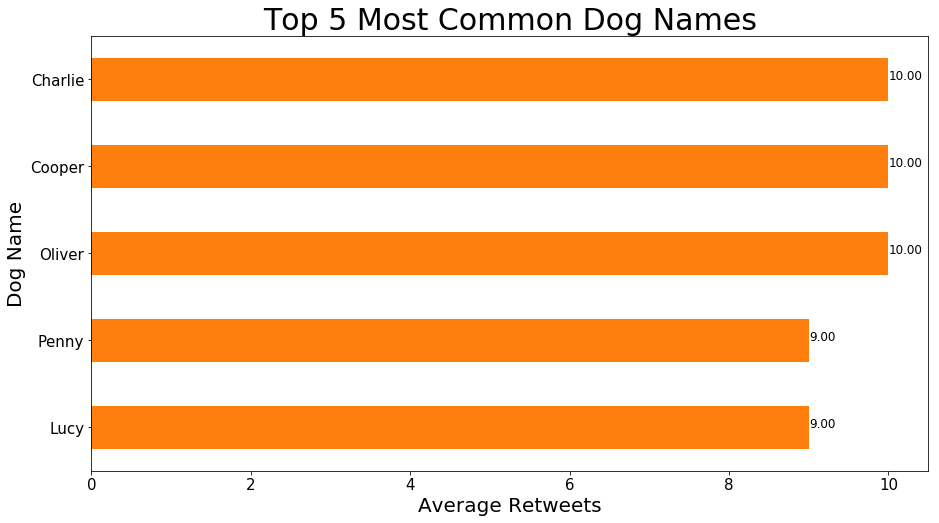

In [176]:
top_5_most_common_by_dog_name = df_master_clean.name.value_counts().sort_values().nlargest(5).sort_values()

plt.figure(figsize=(15,8))
top_5_most_common_by_dog_name.plot(kind='barh', fontsize=15, color="tab:orange");
for i, v in enumerate(top_5_most_common_by_dog_name):
    plt.text(v, i, "{0:.2f}".format(v), color='black', size=12)
plt.title("Top 5 Most Common Dog Names", size=30)
plt.ylabel("Dog Name", size=20)
plt.xlabel("Average Retweets", size=20)
plt.show();

### Question 8. How is the distribution of Tweet sources?

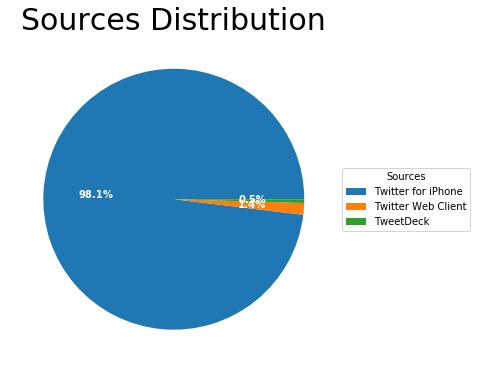

In [177]:
data = df_master_clean['source'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, data.index.tolist(),
          title="Sources",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Sources Distribution", size=30)

plt.show();